In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

In [2]:
plt.rcParams["figure.dpi"] = 120

In [3]:
data_dir = "../data"

In [56]:
label_map = {
    "Sports": "Sports",
    "geography": "Geography",
    "professional_law": "Professional\nLaw",
}

In [58]:
# AG-News, Identity Counterfactual
dataset = "ag_news"
experiment = "identity_counterfactual"

dfs = [
    # (
    #     "BERT 100",
    #     "Sports",
    #     pd.read_pickle(f"{data_dir}/full/bert_results_5795_ds-ag_news.pkl"),
    # ),
    (
        "BERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "RoBERTa",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/roberta_results_5904_ds-ag_news.pkl"),
    ),
    (
        "ALBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/albert_results_5905_ds-ag_news.pkl"),
    ),
    (
        "DistilBERT",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_5906_ds-ag_news.pkl"),
    ),
    (
        "ELECTRA",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/electra_results_5903_ds-ag_news.pkl"),
    ),
]

In [66]:
# AG-News, BERT Different Counterfactuals
dataset = "ag_news"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5877_ds-ag_news.pkl"),
    ),
    (
        "Constant",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5917_cf-constant_ds-ag_news.pkl"),
    ),
    (
        "Synonym",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5918_cf-synonym_ds-ag_news.pkl"),
    ),
    (
        "Random",
        "Sports",
        pd.read_pickle(f"{data_dir}/full/bert_results_5919_cf-random_ds-ag_news.pkl"),
    ),
]

In [74]:
# ScienceQA, Identity Counterfactual
dataset = "scienceqa"
experiment = "identity_counterfactual"

dfs = [
    (
        "BERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "RoBERTa",
        "geography",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6080_ds-scienceqa.pkl"),
    ),
    (
        "ALBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/albert_results_6081_ds-scienceqa.pkl"),
    ),
    (
        "DistilBERT",
        "geography",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6082_ds-scienceqa.pkl"),
    ),
    (
        "ELECTRA",
        "geography",
        pd.read_pickle(f"{data_dir}/full/electra_results_6083_ds-scienceqa.pkl"),
    ),
]

In [82]:
# ScienceQA, BERT Different Counterfactuals
dataset = "scienceqa"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6079_ds-scienceqa.pkl"),
    ),
    (
        "Constant",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6084_cf-constant_ds-scienceqa.pkl"),
    ),
    (
        "Synonym",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6085_cf-synonym_ds-scienceqa.pkl"),
    ),
    (
        "Random",
        "geography",
        pd.read_pickle(f"{data_dir}/full/bert_results_6086_cf-random_ds-scienceqa.pkl"),
    ),
]

In [90]:
# MMLU, Identity Counterfactual
dataset = "mmlu"
experiment = "identity_counterfactual"

dfs = [
    (
        "BERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "RoBERTa",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/roberta_results_6157_ds-mmlu.pkl"),
    ),
    (
        "ALBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/albert_results_6158_ds-mmlu.pkl"),
    ),
    (
        "DistilBERT",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_6159_ds-mmlu.pkl"),
    ),
    (
        "ELECTRA",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/electra_results_6160_ds-mmlu.pkl"),
    ),
]

In [98]:
# MMLU, BERT Different Counterfactuals
dataset = "mmlu"
experiment = "bert_counterfactuals"

dfs = [
    (
        "Identity",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6156_ds-mmlu.pkl"),
    ),
    (
        "Constant",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6161_cf-constant_ds-mmlu.pkl"),
    ),
    (
        "Synonym",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6162_cf-synonym_ds-mmlu.pkl"),
    ),
    (
        "Random",
        "professional_law",
        pd.read_pickle(f"{data_dir}/full/bert_results_6163_cf-random_ds-mmlu.pkl"),
    ),
]

In [99]:
for _, trained_label, df in dfs:
    df.dropna(
        subset=["uncertainty_before", "uncertainty_after"],
        inplace=True,
    )

    df["log_uncertainty_before"] = np.log(df["uncertainty_before"] + 1e-9)
    df["log_uncertainty_after"] = np.log(df["uncertainty_after"] + 1e-9)

    df["uncertainty_logdiff"] = df["log_uncertainty_after"] - df["log_uncertainty_before"]

    df["trained"] = df["label"].apply(
        lambda x: label_map[trained_label] if x == trained_label else "Other"
    )

In [100]:
def plot(dfs, x_label, dataset, experiment):
    output_dir = os.path.join("../figures/bert", dataset, experiment, x_label)
    os.makedirs(output_dir, exist_ok=True)

    dfs_melted = []
    for name, trained_label, df in dfs:
        melted = df[[x_label, "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=[x_label],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        )
        melted["type"] = melted["type"].map(
            {"uncertainty_before": "Before", "uncertainty_after": "After"}
        )
        dfs_melted.append((name, trained_label, melted))

    metrics = [
        ("uncertainty", "Before/After Uncertainty (log scale)"),
        ("uncertainty_logdiff", "Difference in log-space"),
    ]

    x_plots = len(dfs)
    y_plots = len(metrics)
    fig_grid, axs = plt.subplots(
        y_plots, x_plots, figsize=(4 * x_plots, 6 * y_plots), squeeze=False
    )

    for i, (name, trained_label, df) in enumerate(dfs):
        _, __, df_melted = dfs_melted[i]

        for row_idx, (metric_key, _) in enumerate(metrics):
            fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)

            if x_label == "trained":
                order = [label_map[trained_label], "Other"]
            elif x_label == "label":
                labels = df[x_label].unique().tolist()
                order = [trained_label] + sorted(
                    l for l in labels if l != trained_label
                )
            else:
                order = sorted(df[x_label].unique())

            # Select data and plot
            if metric_key == "uncertainty":
                sns.barplot(
                    data=df_melted,
                    x=x_label,
                    y="uncertainty",
                    order=order,
                    hue="type",
                    ax=ax,
                )
                sns.barplot(
                    data=df_melted,
                    x=x_label,
                    order=order,
                    y="uncertainty",
                    hue="type",
                    ax=axs[row_idx][i],
                )
                ax.set_yscale("log")
                axs[row_idx][i].set_yscale("log")
            else:
                sns.barplot(data=df, x=x_label, order=order, y=metric_key, ax=ax)
                sns.barplot(
                    data=df, x=x_label, order=order, y=metric_key, ax=axs[row_idx][i]
                )

            # Highlight trained label
            x_ticks = ax.get_xticks()
            x_labels = [text.get_text() for text in ax.get_xticklabels()]
            trained_pos = next(
                (
                    pos
                    for pos, label in enumerate(x_labels)
                    if label == label_map[trained_label] or label == trained_label
                ),
                -1,
            )

            for plot_ax in [ax, axs[row_idx][i]]:
                for bar in plot_ax.patches:
                    bar_center = bar.get_x() + bar.get_width() / 2
                    if (
                        trained_pos != -1
                        and abs(bar_center - x_ticks[trained_pos]) < 0.5
                    ):
                        bar.set_hatch("////")

            # Legends
            if metric_key == "uncertainty":
                handles = [
                    Rectangle((0, 0), 1, 1, facecolor="C0"),
                    Rectangle((0, 0), 1, 1, facecolor="C1"),
                    Rectangle(
                        (0, 0), 1, 1, facecolor="none", hatch="////", edgecolor="black"
                    ),
                ]
                labels = ["Before", "After", "Trained Label"]
            else:
                handles = [
                    Patch(
                        facecolor="white",
                        edgecolor="black",
                        hatch="////",
                        label="Trained Label",
                    )
                ]
                labels = ["Trained Label"]

            axs[row_idx][i].legend(
                handles=handles, labels=labels, loc="upper left", fontsize="small"
            )

            ax.tick_params(axis="x", labelrotation=90)
            axs[row_idx][i].tick_params(axis="x", labelrotation=90)
            axs[row_idx][i].set_title(name)

            ax.set_xlabel("")
            ax.set_ylabel("")
            if ax.get_legend():
                ax.legend_.remove()

            # Save subplot
            name_dir = os.path.join(output_dir, name)
            os.makedirs(name_dir, exist_ok=True)
            fig.savefig(
                os.path.join(name_dir, f"{metric_key}.png"),
                transparent=True,
                dpi=300,
            )
            plt.close(fig)

    plt.tight_layout()
    plt.show()


def plot_log_did(dfs, dataset, experiment):
    output_dir = os.path.join("../figures/bert", dataset, experiment, "diff_in_diff")
    os.makedirs(output_dir, exist_ok=True)

    n_cols = len(dfs)
    fig_grid, axs = plt.subplots(1, n_cols, figsize=(5 * n_cols, 4), squeeze=False)

    for i, (name, trained_label, df) in enumerate(dfs):
        # Reshape from wide to long format
        melted = df[["trained", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["trained"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        )
        melted["type"] = melted["type"].map(
            {"uncertainty_before": "Before", "uncertainty_after": "After"}
        )
        # melted["trained"] = melted["trained"].apply(lambda x: "Untrained" if x == "Other" else "Trained")
        melted["log_uncertainty"] = np.log(melted["uncertainty"] + 1e-9)

        # Individual plot for saving
        fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
        sns.lineplot(
            data=melted,
            x="type",
            y="log_uncertainty",
            hue="trained",
            hue_order=["Other", label_map[trained_label]],
            # errorbar=None,
            marker="o",
            ax=ax,
        )

        # ax.set_title(name)
        # ax.set_ylabel("Log Uncertainty")
        # ax.set_xlabel("Time")
        # ax.legend(title="Label", fontsize="small", title_fontsize="small")

        ax.set_title("")
        ax.set_ylabel("")
        ax.set_xlabel("")
        if ax.get_legend():
            ax.legend_.remove()
        plt.tight_layout()

        # Save individual plot
        filename = f"{name}.png"
        fig.savefig(
            os.path.join(output_dir, filename),
            transparent=True,
            dpi=300,
        )
        plt.close(fig)

        # Also draw into notebook grid
        ax_grid = axs[0][i]
        sns.lineplot(
            data=melted,
            x="type",
            y="log_uncertainty",
            hue="trained",
            hue_order=["Other", label_map[trained_label]],
            # errorbar=None,
            marker="o",
            ax=ax_grid,
        )
        ax_grid.set_title(name)
        ax_grid.set_ylabel("Log Uncertainty")
        ax_grid.set_xlabel(None)
        ax_grid.legend(title="Label", fontsize="small", title_fontsize="small")

    plt.tight_layout()
    plt.show()


def t_tests(dfs, metric):
    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]
        other_groups = df[df["label"] != trained_label][metric]

        t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

        print(
            f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
        )

    print()

    for name, trained_label, df in dfs:
        trained_group = df[df["label"] == trained_label][metric]

        labels = df["label"].unique()

        for label in labels:
            if label != trained_label:
                other_group = df[df["label"] == label][metric]
                t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
                print(
                    f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}"
                )


def compute_log_diff_in_diff(dfs):
    for name, trained_label, df in dfs:
        # Melt to long format
        melted = df[["trained", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["trained"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="time",
            value_name="uncertainty",
        )

        # Map time to binary post indicator
        melted["post"] = melted["time"].map(
            {"uncertainty_before": 0, "uncertainty_after": 1}
        )

        # Treated indicator: trained != "Other"
        melted["treated"] = melted["trained"].apply(lambda x: 1 if x != "Other" else 0)

        # Log-transform the outcome
        melted["log_uncertainty"] = np.log(melted["uncertainty"] + 1e-9)

        # Fit DiD model
        model = smf.ols(
            "log_uncertainty ~ post + treated + post:treated", data=melted
        ).fit()

        did_coef = model.params["post:treated"]
        did_pval = model.pvalues["post:treated"]
        did_stderr = model.bse["post:treated"]

        print(
            f"{name:<10} {trained_label} log-DiD effect: {did_coef:>10.4f}, SE: {did_stderr:>8.4f}, P-value: {did_pval:.4f}"
        )

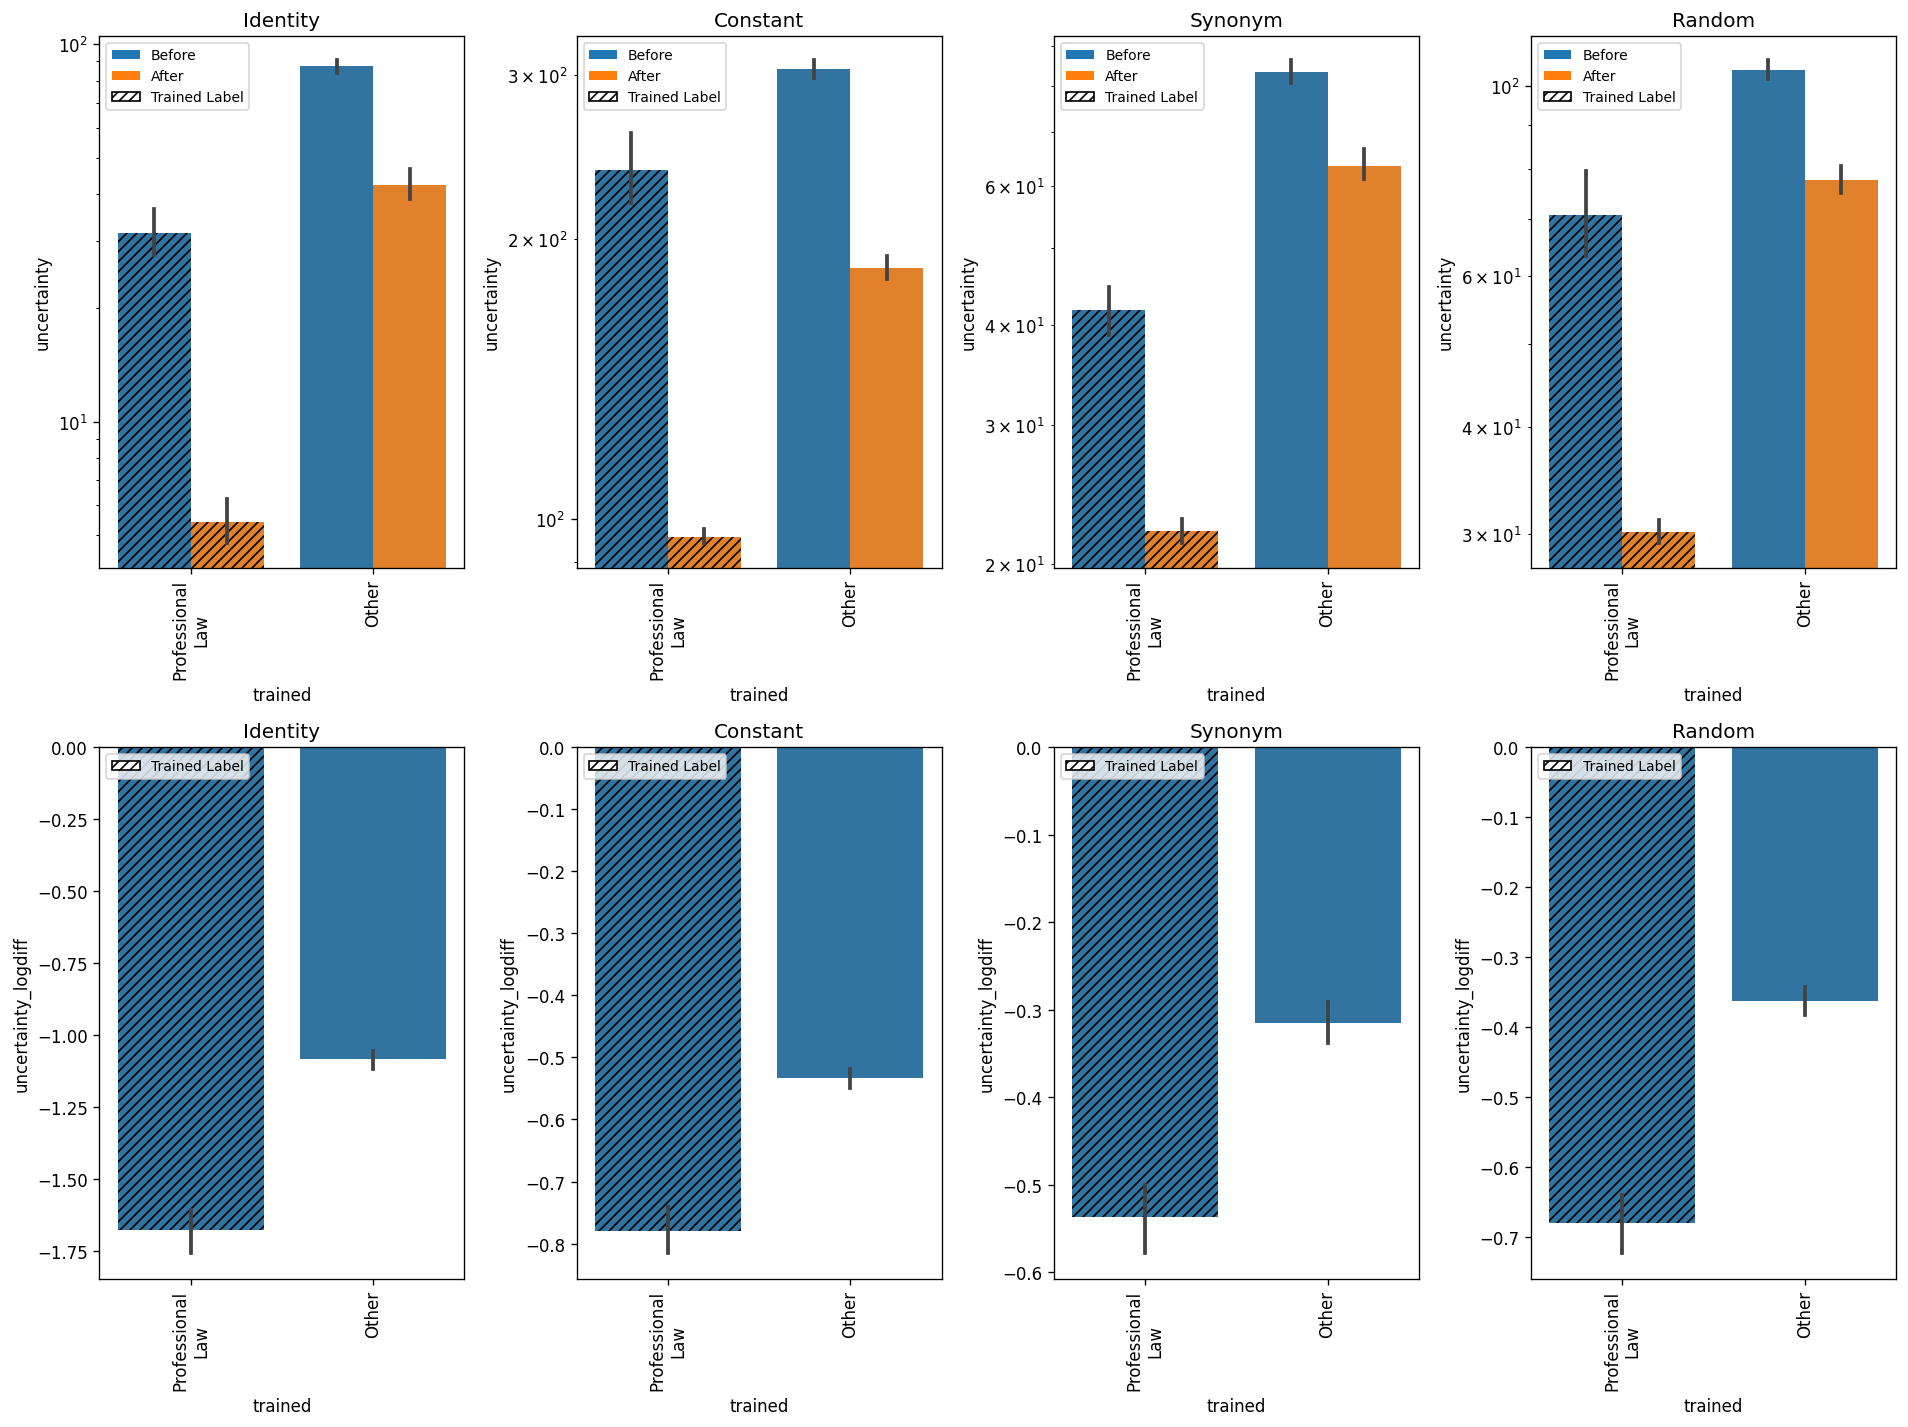

In [101]:
plot(dfs, "trained", experiment, dataset)

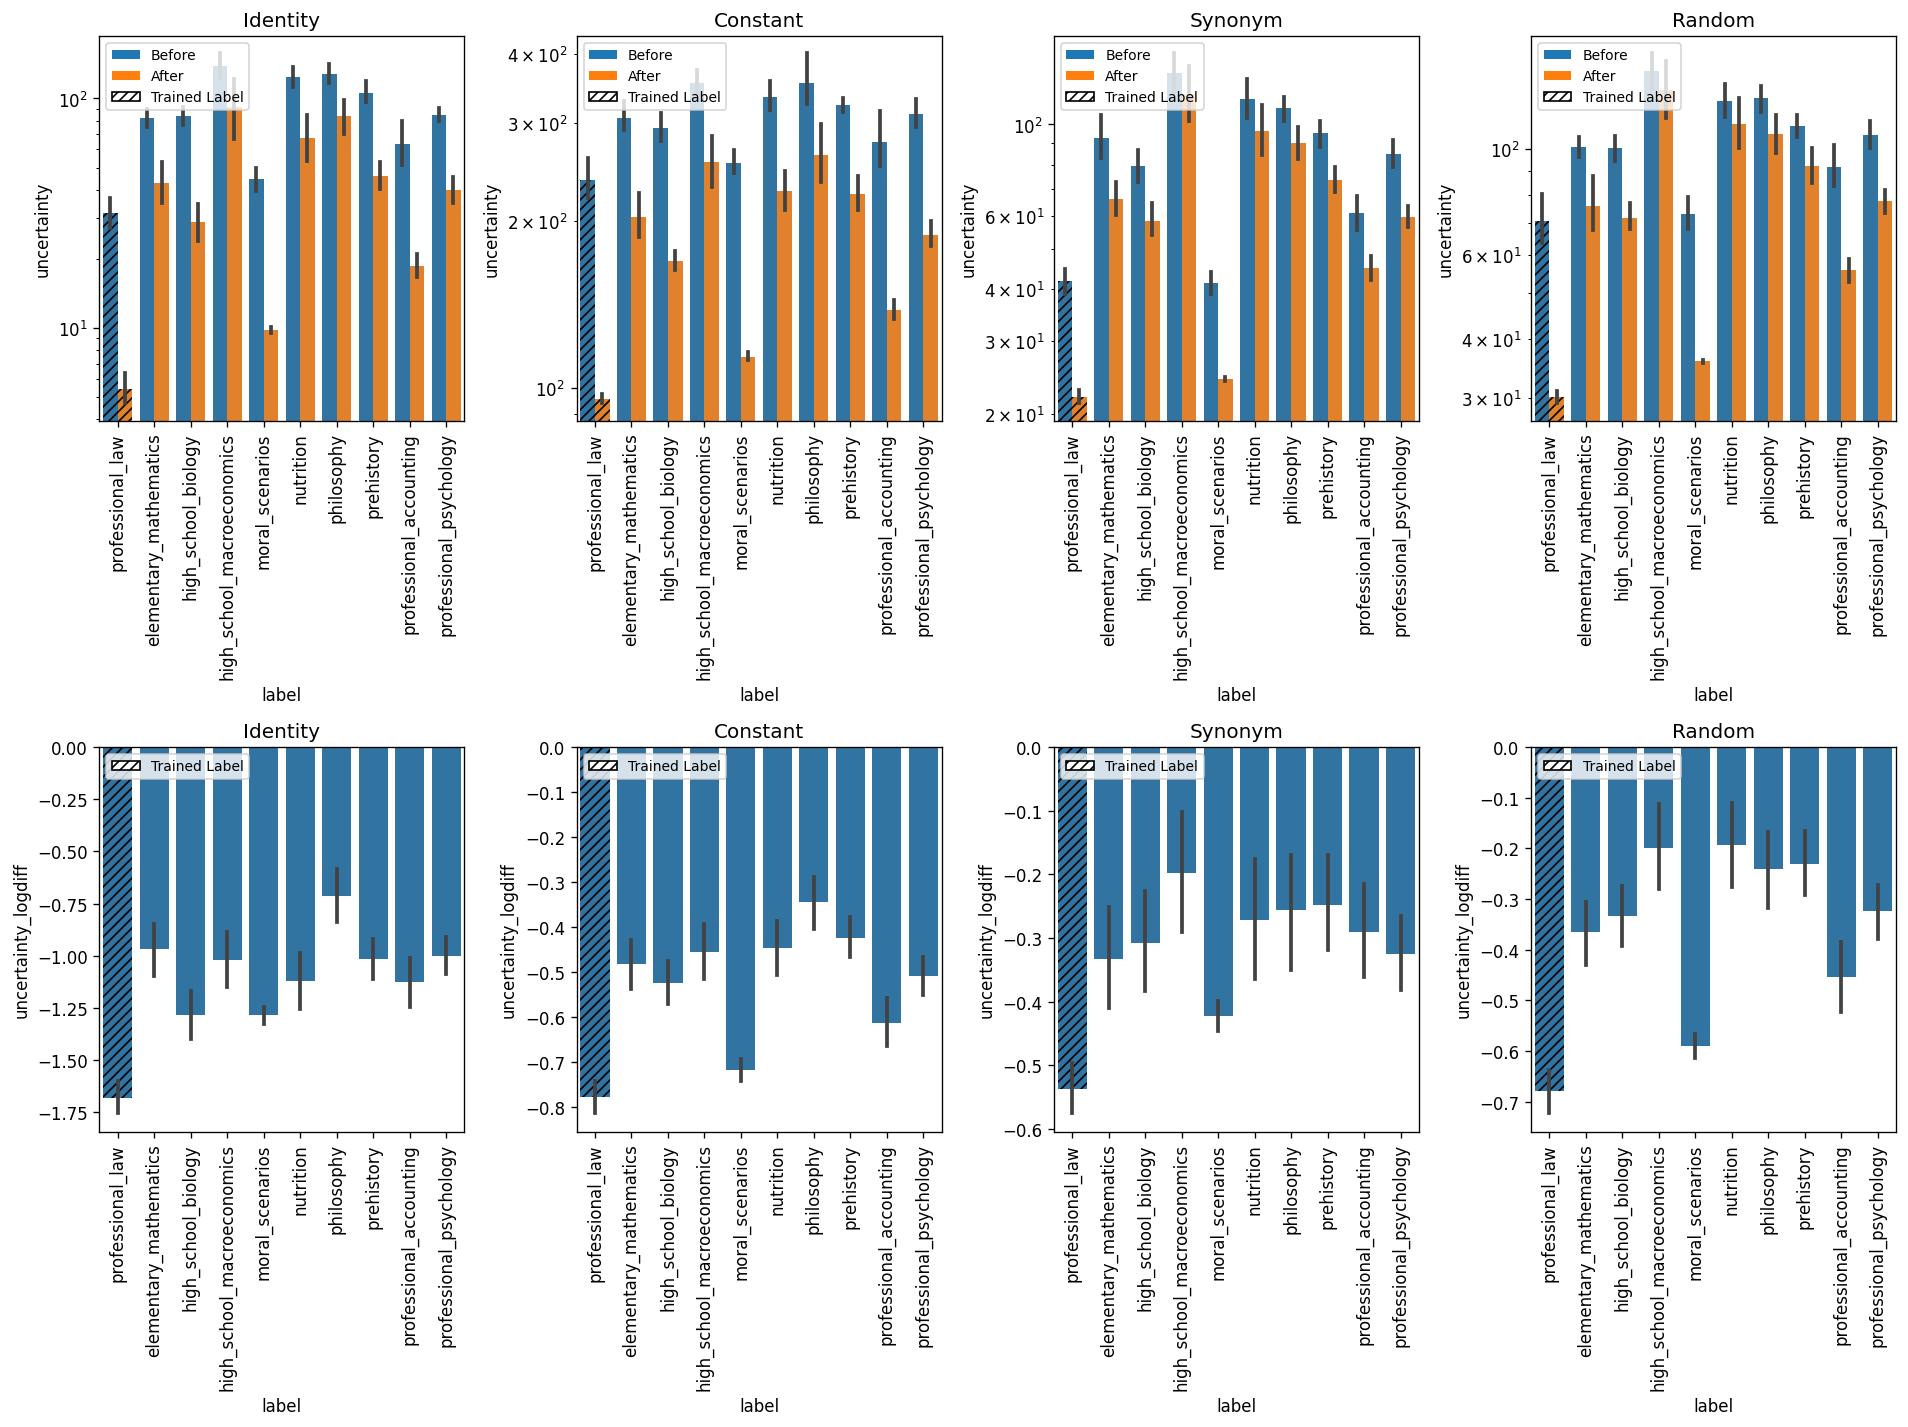

In [102]:
plot(dfs, "label", experiment, dataset)

/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_20769/66784095.py:184: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_20769/66784095.py:184: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_20769/66784095.py:184: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/f5/0n6l0yh12yggft3np84h1xxr0000gn/T/ipykernel_20769/66784095.py:184: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


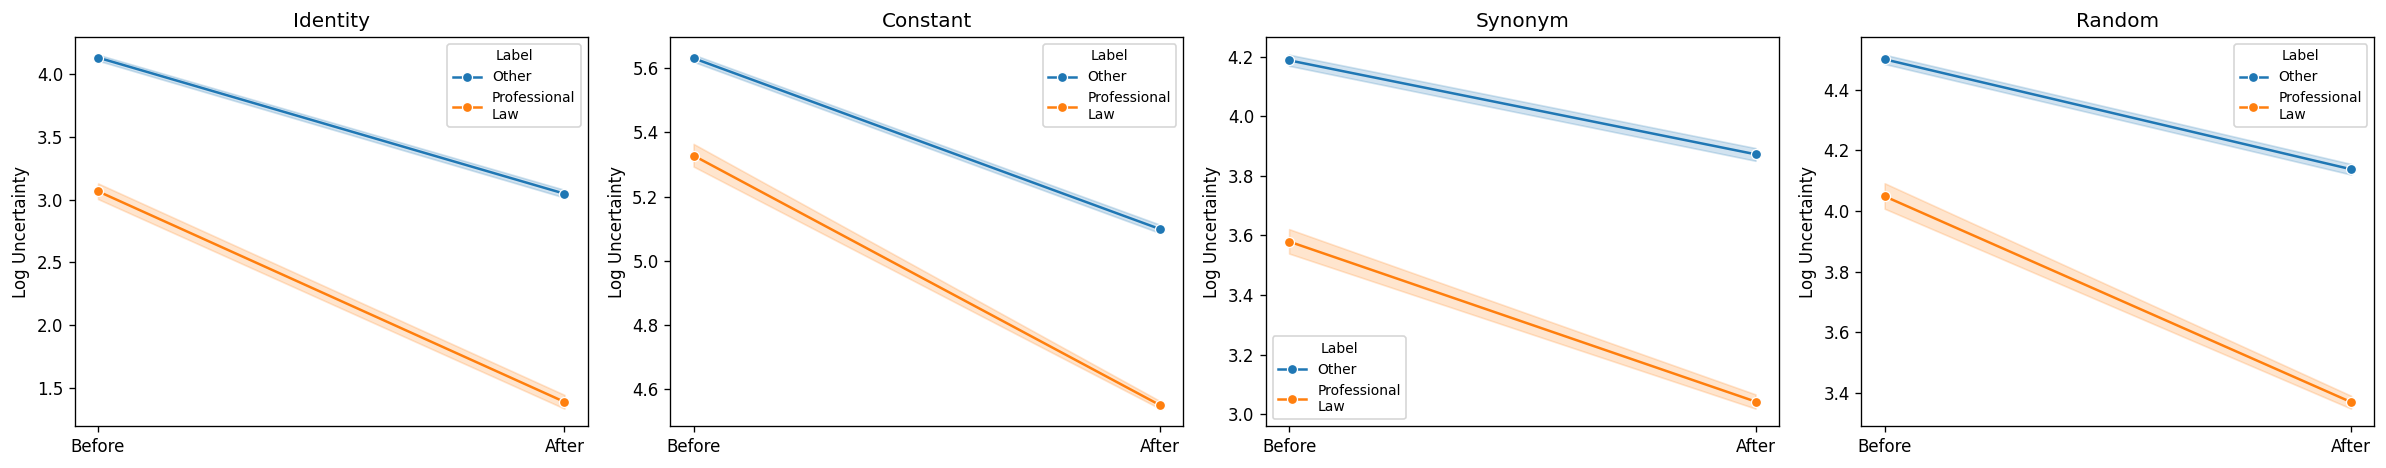

In [103]:
plot_log_did(dfs, experiment, dataset)

In [104]:
t_tests(dfs, "uncertainty_logdiff")

Identity   professional_law vs Others T-statistic:     -13.9658, P-value: 0.0000
Constant   professional_law vs Others T-statistic:     -12.1336, P-value: 0.0000
Synonym    professional_law vs Others T-statistic:      -9.5672, P-value: 0.0000
Random     professional_law vs Others T-statistic:     -12.9525, P-value: 0.0000

Identity   professional_law vs moral_scenarios T-statistic:      -8.9573, P-value: 0.0000
Identity   professional_law vs professional_psychology T-statistic:     -11.3850, P-value: 0.0000
Identity   professional_law vs high_school_macroeconomics T-statistic:      -8.5063, P-value: 0.0000
Identity   professional_law vs elementary_mathematics T-statistic:      -9.5192, P-value: 0.0000
Identity   professional_law vs prehistory T-statistic:     -10.5587, P-value: 0.0000
Identity   professional_law vs philosophy T-statistic:     -12.8297, P-value: 0.0000
Identity   professional_law vs high_school_biology T-statistic:      -5.4046, P-value: 0.0000
Identity   professional_l

In [105]:
compute_log_diff_in_diff(dfs)

Identity   professional_law log-DiD effect:    -0.5939, SE:   0.0566, P-value: 0.0000
Constant   professional_law log-DiD effect:    -0.2458, SE:   0.0253, P-value: 0.0000
Synonym    professional_law log-DiD effect:    -0.2219, SE:   0.0399, P-value: 0.0000
Random     professional_law log-DiD effect:    -0.3164, SE:   0.0333, P-value: 0.0000
